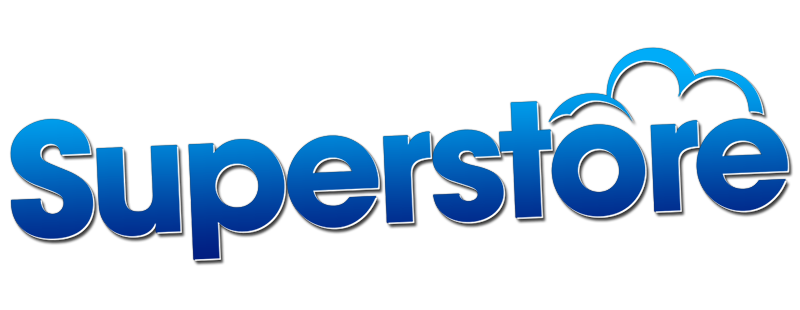

**<center><span style="font-size: 30px;">Superstore: исследование данных ecommerce</span></center>**

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Техническое-задание" data-toc-modified-id="Техническое-задание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Техническое задание</a></span></li><li><span><a href="#Исходные-данные" data-toc-modified-id="Исходные-данные-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исходные данные</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Построение-дашбода" data-toc-modified-id="Построение-дашбода-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение дашбода</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Техническое задание

**Цель исследования** - изучить данные интеренет-магазина и построить дашборд в Excel для анализа выручки и области продаж. 

Для реализации цели необходимо решить следующие **задачи**:

- подготовить данные перед анализом;
- построить дашборд для анализа выручки, маржинальности подкатегорий, числа заказов по странам и годам.

# Исходные данные

In [1]:
import pandas as pd

Ознакомимся с исходными данными Superstore. Для преодбработки и исследования будем использовать только Excel.

In [2]:
# чтениее файла
df = pd.read_excel('/Users/anastasia/Desktop/Superstore.xlsx', sheet_name='Исходные данные')  

In [3]:
pd.set_option('display.max_columns', None)

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,1972-09-01 00:00:00,Medium
2,48883,HU-2011-1220,2011-01-01,2011-01-05,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.0,29.64,2017-08-01 00:00:00,High
3,11731,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,1982-04-01 00:00:00,High
4,22255,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.1,37.77,2025-07-04 00:00:00,Medium


- Row ID - ID строки
- Order ID - ID заказа
- Order Date - Дата заказа
- Ship Date - Дата отгрузки
- Ship Mode - Способ доставки
- Customer ID - ID клиента
- Customer Name - Имя клиента
- Segment - Сегмент
- City - Город
- State - Штат
- Country - Страна
- Postal Code - Почтовый индекс
- Market - ТЦ/магазин
- Region - Регион
- Product ID - ID товара
- Category - Категория
- Sub-Category - Подкатегория
- Product Name - Наименование товара
- Sales - Продажи
- Quantity - Количество
- Discount - Скидка
- Profit - Прибыль
- Shipping Cost - Стоимость доставки
- Order Priority - Приоритет заказа

**Итак**, перед нами 51290 строк выгрузки данных супермаркета Superstore. Необходимо изменить типы данных, удалить дубликаты и обработать возможные пропуски.

# Предобработка данных

**План предобработки в Excel:**

- Визуально оценить данные.
Заголвки переименовывать не будем, так как они понятны и не машают при работе в Excel. Необходимо изменить типы данных в некоторых столбцах. Также пропуски в почтовом индексе нас не интересуют, так как эта информация не важна для анализа, а также заполнению не подлежит. 
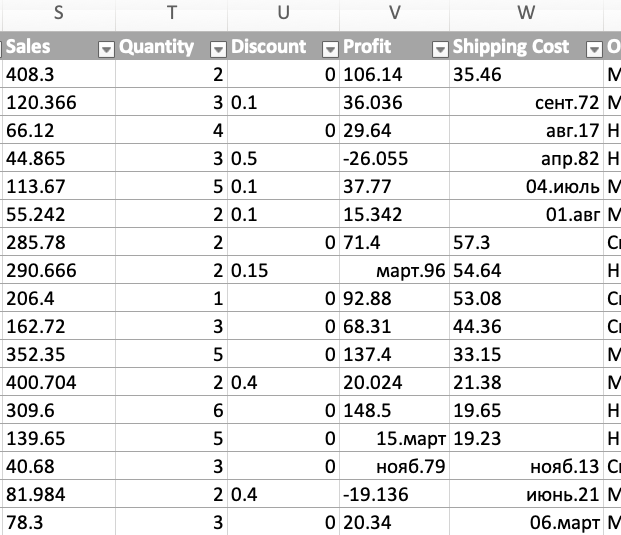
- Удалить дубликаты и пустые строки.
Явные дубликаты не найдены, как и пустые строки.
Имеются неявные дубликаты: Almaty City и Almaty. Также автоматически удалили лишние пробелы. Также имеются дубликаты в регионах, но оставим как есть, так как данные не используются. 
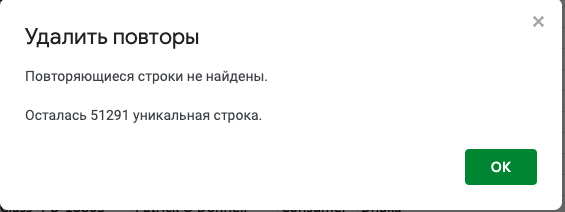
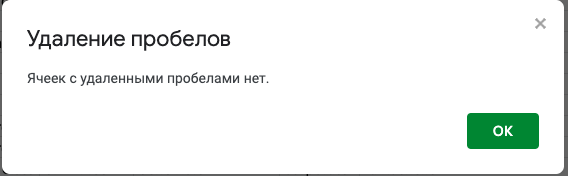
- Удалить лишние пробелы.
Пробелы удаленыв в некоторых ячейках.
- Привести данные к нужным форматам.
В таблице присутствуют колонки смешенного типа. С помощью "заменить и найти" приведены данные к числовому. Например "нояб.82" --> 11,82. 
- Найти пропущенные значения, заполнить их на основе других данных или удалить. 
Значения постового индекса нас не интересуют, так что оставим как есть. 
- Найти некорректные значения, исправить или удалить. Действие зависит от количества таких данных и специфики задачи.
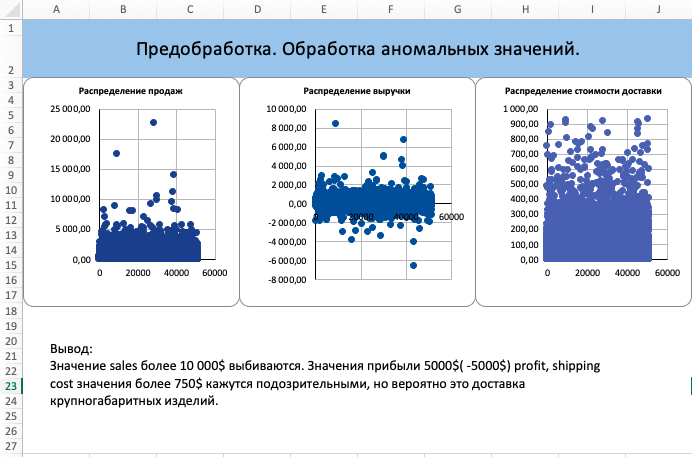
Создадим фильтр с sales&pfofit. После фильтрации осталось 51284 строки.
- Настроить удобное для работы форматирование.
Оставим как есть, только выделим заголовки серым цветом.
- Добавить новые столбцы

Profit Margin = Profit / Sales

Order Processing Time = Ship Date - Order Date


# Построение дашбода

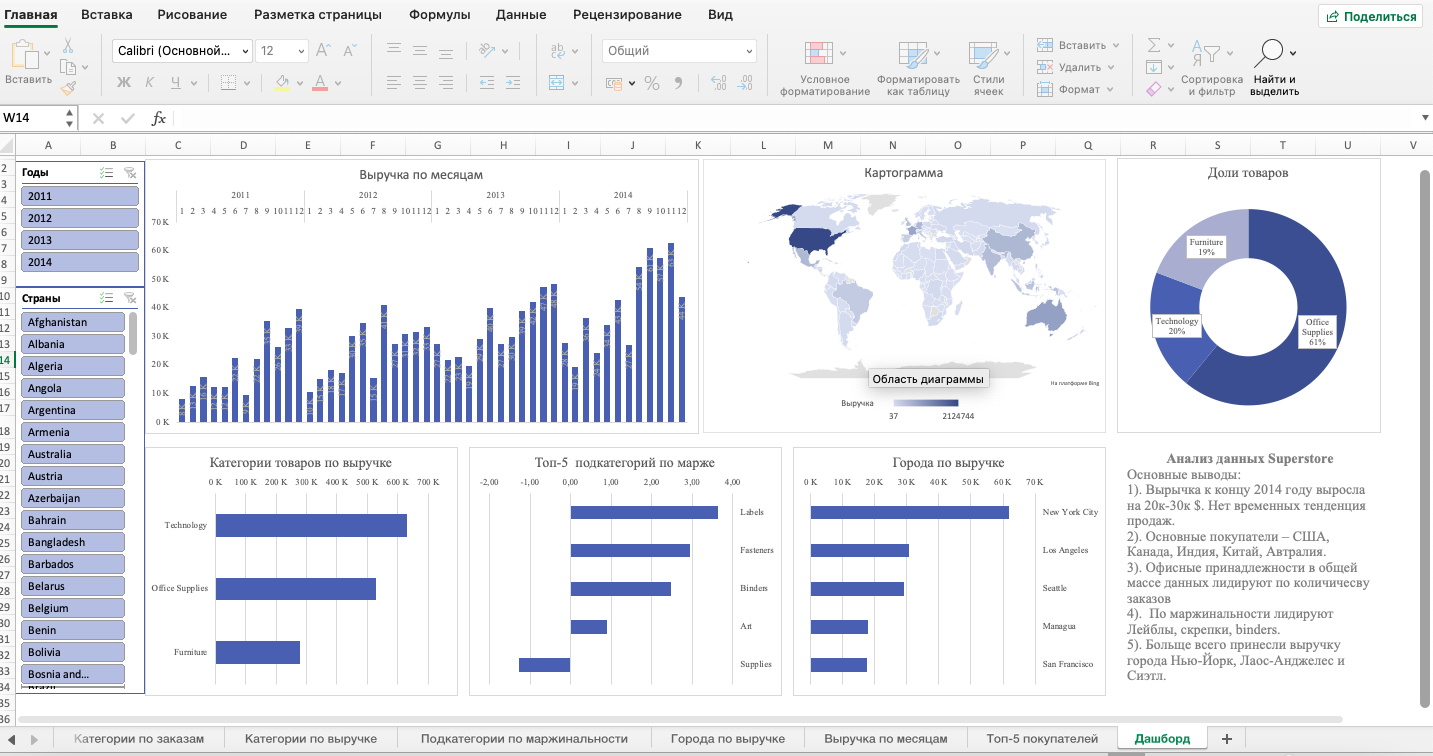

# Вывод

1). Вырычка к концу 2014 году выросла на 20к-30к $. Нет временных тенденция продаж.

2). Основные покупатели – США, Канада, Индия, Китай, Автралия.

3). Офисные принадлежности в общей массе данных лидируют по количичесву заказов

4).  По маржинальности лидируют  Лейблы, скрепки, binders.

5). Больще всего принесли выручку города Нью-Йорк, Лаос-Анджелес и Сиэтл.
